# 와인 데이터 이진분류
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [1]:
!gdown https://raw.githubusercontent.com/devdio/datasets/main/winequality-rw.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/winequality-rw.csv
To: /content/winequality-rw.csv
421kB [00:00, 32.5MB/s]       


In [8]:
wine = pd.read_csv("/content/winequality-rw.csv", index_col=0)
wine.shape

(6497, 13)

In [9]:
wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
target                  0
dtype: int64

In [10]:
wine.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
wine['target'].value_counts()

white    4898
red      1599
Name: target, dtype: int64

In [11]:
df = wine.copy()
df['target'] = df['target'].map({'red':0,
                                 'white':1})

In [14]:
X = df.drop(['target'], axis=1)
y = df['target']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2022)
X_train.shape, X_test.shape

((5197, 12), (1300, 12))

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.values
y_test = y_test.values

## 모델

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  target                6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [33]:
loss = tf.keras.losses.binary_crossentropy
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

model = keras.Sequential([
    layers.Dense(units=64, activation='relu', input_shape=(12,)),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = adam,
    loss = loss,
    metrics = ['acc']
)

In [34]:
EPOCHS = 500
BATCH_SIZE = 32

history = model.fit(X_train, y_train,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_split = 0.2,
                    verbose = 1)

Epoch 1/500
130/130 [==============================] - 1s 4ms/step - loss: 0.1827 - acc: 0.9581 - val_loss: 0.0534 - val_acc: 0.9923
Epoch 2/500
130/130 [==============================] - 0s 2ms/step - loss: 0.0379 - acc: 0.9935 - val_loss: 0.0373 - val_acc: 0.9942
Epoch 3/500
130/130 [==============================] - 0s 3ms/step - loss: 0.0293 - acc: 0.9949 - val_loss: 0.0323 - val_acc: 0.9952
Epoch 4/500
130/130 [==============================] - 0s 3ms/step - loss: 0.0243 - acc: 0.9954 - val_loss: 0.0275 - val_acc: 0.9952
Epoch 5/500
130/130 [==============================] - 0s 3ms/step - loss: 0.0208 - acc: 0.9962 - val_loss: 0.0260 - val_acc: 0.9952
Epoch 6/500
130/130 [==============================] - 0s 3ms/step - loss: 0.0187 - acc: 0.9964 - val_loss: 0.0241 - val_acc: 0.9952
Epoch 7/500
130/130 [==============================] - 0s 3ms/step - loss: 0.0170 - acc: 0.9969 - val_loss: 0.0237 - val_acc: 0.9942
Epoch 8/500
130/130 [==============================] - 0s 2ms/step - 

In [45]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

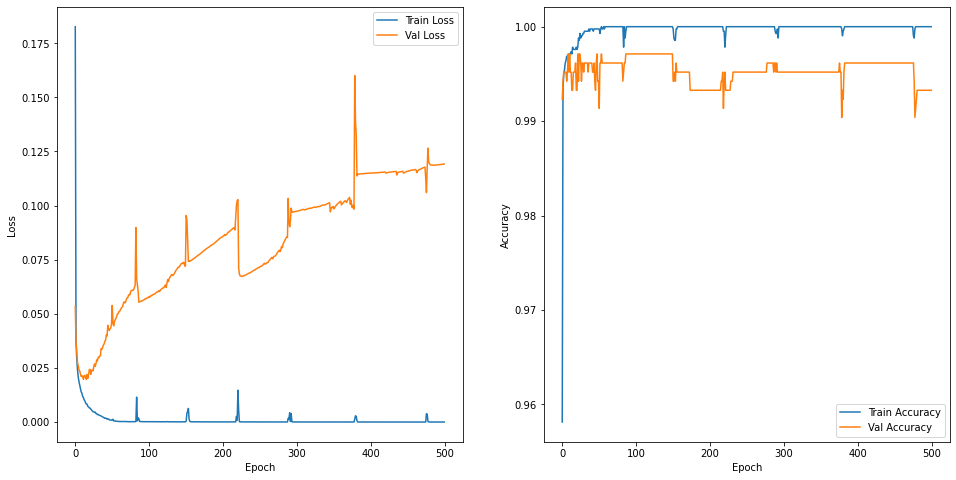

In [46]:
plot_history(history)

In [35]:
model.evaluate(X_train, y_train)

163/163 [==============================] - 0s 2ms/step - loss: 0.0239 - acc: 0.9987


[0.023865165188908577, 0.9986530542373657]

In [36]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 2ms/step - loss: 0.2191 - acc: 0.9962


[0.21912457048892975, 0.9961538314819336]

In [37]:
y_pred = model.predict(X_test)
y_pred

41/41 [==============================] - 0s 2ms/step


array([[1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       ...,
       [1.0000000e+00],
       [2.6353206e-09],
       [1.0000000e+00]], dtype=float32)

In [38]:
y_pred = (y_pred > 0.5).astype(int)
y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [42]:
y_pred = y_pred.reshape(-1)

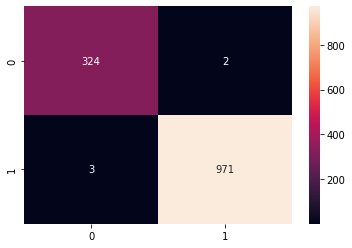

In [52]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='1g')

In [ ]:
}